In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pickle

Re-loading the dataset in every run

In [2]:
file_path = r"C:\Users\01psd\OneDrive\Desktop\MP sem 6\MP_traffic_data.csv"
def load_dataset():
    return pd.read_csv(file_path)

data = load_dataset()
data

,date_time,is_holiday,air_pollution_index,humidity,visibility_in_miles,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour,month_day,weekday,month,year
0,02-10-2012 15:00,Yes,184,64,7,283.73,1,Clear,sky is clear,5584,15,2,2,10,2012
1,02-10-2012 16:00,Yes,167,64,7,305.86,1,Clear,sky is clear,6015,16,2,2,10,2012
2,02-10-2012 17:00,Yes,119,63,6,306.14,20,Clouds,few clouds,5791,17,2,2,10,2012
3,02-10-2012 18:00,Yes,161,63,3,305.10,20,Clouds,few clouds,4770,18,2,2,10,2012
4,02-10-2012 19:00,Yes,243,62,8,302.97,20,Clouds,few clouds,3539,19,2,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,17-05-2017 21:00,Yes,74,85,7,299.88,90,Mist,mist,2348,21,17,3,5,2017
33740,17-05-2017 22:00,Yes,81,70,2,298.95,90,Rain,heavy intensity rain,2194,22,17,3,5,2017
33741,17-05-2017 22:00,No,138,70,1,298.95,90,Mist,mist,2194,22,17,3,5,2017
33742,17-05-2017 23:00,No,229,66,6,297.75,90,Rain,heavy intensity rain,1328,23,17,3,5,2017


Converting the date to UNIX date-time taaki date-time format mein reference le saku

In [3]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

ERROR DURING INITIAL RUN; AB SOLVED HAI || Loading the dataset (nahi chahiye, we are re-loading the dataset every run taaki har baar data mein changes save na ho)


In [4]:
# data = pd.read_csv('MP_traffic_data.csv')

Pre-processing the data, because zaruri hai boss

In [5]:
data = data.sort_values(by=['date_time'], ascending=True).reset_index(drop=True)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] == 'Yes', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'No', 'is_holiday'] = 0

In [6]:
data['temperature'] -= 273

In [7]:
'''data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)'''

'data[\'date_time\'] = pd.to_datetime(data[\'date_time\'])\ndata[\'hour\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%H")))\ndata[\'month_day\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%d")))\ndata[\'weekday\'] = data[\'date_time\'].map(lambda x: x.weekday()+1)\ndata[\'month\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%m")))\ndata[\'year\'] = data[\'date_time\'].map(lambda x: int(x.strftime("%Y")))\ndata.to_csv("traffic_volume_data.csv", index=None)'

In [8]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,visibility_in_miles,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour,month_day,weekday,month,year
0,01-01-2013 00:00,1,260,72,4,2.49,58,Clouds,broken clouds,1439,0,1,2,1,2013
1,01-01-2013 01:00,1,161,72,7,2.78,40,Clouds,scattered clouds,1502,1,1,2,1,2013
2,01-01-2013 02:00,0,205,78,3,3.16,75,Snow,heavy snow,933,2,1,2,1,2013
3,01-01-2013 03:00,0,135,78,8,2.95,90,Clouds,overcast clouds,576,3,1,2,1,2013
4,01-01-2013 04:00,1,52,85,7,2.65,90,Clouds,overcast clouds,372,4,1,2,1,2013


Plot graphs ka font

In [9]:
sns.set_theme(style="darkgrid")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

Data Preparation for machine-modeling

In [10]:
warnings.filterwarnings('ignore')
#data = pd.read_csv("")
data = data.sample(10000).reset_index(drop=True)
textual_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month']

In [11]:
features = numeric_columns + textual_columns
X = data[features]

In [12]:
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,22.43,2,9,7,2013,5,Clear,sky is clear
1,1,22.82,5,15,30,2015,10,Clear,sky is clear
2,0,28.54,6,14,14,2014,6,Rain,moderate rain
3,0,15.15,2,8,22,2016,3,Clear,sky is clear
4,1,20.19,6,8,20,2012,10,Drizzle,drizzle


In [13]:
X.shape

(10000, 9)

yaha maine weather type aur description ko numerical values mein laane ke liye, uske occurences ko positional values mein laaya 
jisse model mein saare unique weather type aur description ke elements ko ek unique value assign hojaye

In [14]:
F1 = list(data['weather_type'])
F2 = list(data['weather_description'])

In [15]:
F1_features = ['Rain', 'Clear', 'Clouds', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Snow', 'Thunderstorm', 'Smoke', 'Squall']
F2_features = ['light rain', 'sky is clear', 'broken clouds', 'overcast clouds', 'drizzle', 'mist', 'haze', 'fog', 'light snow', 'thunderstorm', 'heavy snow', 'Sky is Clear', 'heavy intensity rain', 'moderate rain', 'scattered clouds', 'few clouds', 'very heavy rain', 'light intensity drizzle', 'thunderstorm with heavy rain', 'snow', 'proximity thunderstorm', 'proximity thunderstorm with rain', 'thunderstorm with light rain', 'proximity shower rain', 'thunderstorm with rain', 'heavy intensity drizzle', 'thunderstorm with drizzle', 'smoke', 'sleet', 'light rain and snow', 'thunderstorm with light drizzle', 'proximity thunderstorm with drizzle', 'SQUALLS', 'shower drizzle', 'freezing rain', 'shower snow']

In [16]:
final_F1 = []
final_F2 = []

In [17]:
for i in F1:
    if i not in F1_features:
        final_F1.append(0)
    else:
        final_F1.append((F1_features.index(i))+1)
for i in F2:
    if i not in F2_features:
        final_F2.append(0)
    else:
        final_F2.append((F2_features.index(i))+1)

In [18]:
data['weather_type'] = final_F1
data['weather_description'] = final_F2

In [19]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,visibility_in_miles,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour,month_day,weekday,month,year
0,07-05-2013 09:00,1,61,88,6,22.43,1,2,2,5229,9,7,2,5,2013
1,30-10-2015 15:00,1,147,92,5,22.82,1,2,2,6158,15,30,5,10,2015
2,14-06-2014 14:00,0,188,74,9,28.54,92,1,14,4360,14,14,6,6,2014
3,22-03-2016 08:00,0,94,41,4,15.15,1,2,2,6137,8,22,2,3,2016
4,20-10-2012 08:00,1,120,100,5,20.19,100,4,5,2787,8,20,6,10,2012


idhar maine updated data ko dump kiya hai jisse hum application run karenge

In [20]:
updated_data = data
with open('dump_updated.pkl', 'wb') as f:
    pickle.dump(updated_data, f)

In [21]:
# volume = data['traffic_volume']
# with open('dump_volume.pkl', 'wb') as f:
#     pickle.dump(volume, f)

In [22]:
features = numeric_columns + textual_columns
target = ['traffic_volume']

In [23]:
X = data[features] # 9 features
Y = data[target] # traffic volume
print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


FINAL RUN: SOLVED || Dumping the input feature i.e X and the pre-processed, transformed data through pickle to a local host

In [24]:
# with open('input_Y.pkl', 'wb') as f:
#     pickle.dump(Y, f)

In [25]:
# with open('input.pkl', 'wb') as f:
#     pickle.dump(X, f)

In [26]:
# with open('entire_dataset.pkl', 'wb') as f:
#     pickle.dump(data, f)

Glimpse of the features

In [27]:
X.head(10)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,22.43,2,9,7,2013,5,2,2
1,1,22.82,5,15,30,2015,10,2,2
2,0,28.54,6,14,14,2014,6,1,14
3,0,15.15,2,8,22,2016,3,2,2
4,1,20.19,6,8,20,2012,10,4,5
5,1,28.52,4,7,26,2016,5,3,4
6,1,26.86,3,6,3,2013,7,3,15
7,0,-3.36,7,2,23,2014,2,2,2
8,1,24.45,2,8,20,2014,5,1,1
9,1,20.65,5,5,14,2017,4,3,4


In [28]:
Y.head(10)

,traffic_volume
0,5229
1,6158
2,4360
3,6137
4,2787
5,6983
6,5661
7,570
8,6182
9,2425


THODA SA GRAPH PLOTTING

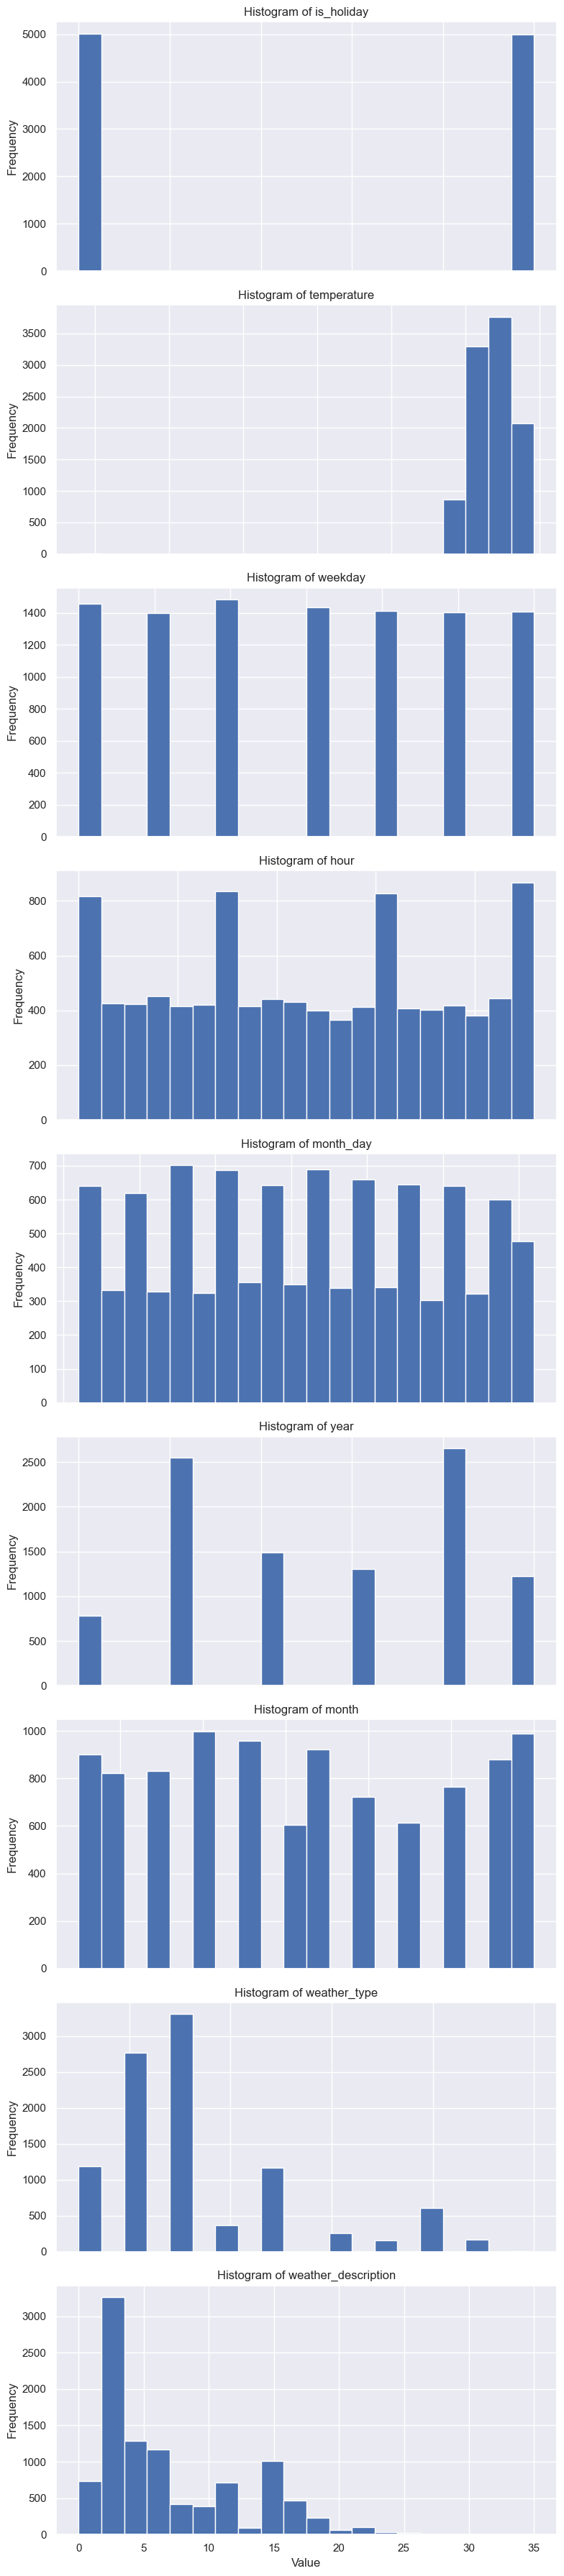

In [29]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4*len(features)))
for i, feature in enumerate(features):
    ax = axes[i]
    data[feature].hist(bins=20, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    if i < len(features) - 1:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Value')
plt.tight_layout()
plt.show()

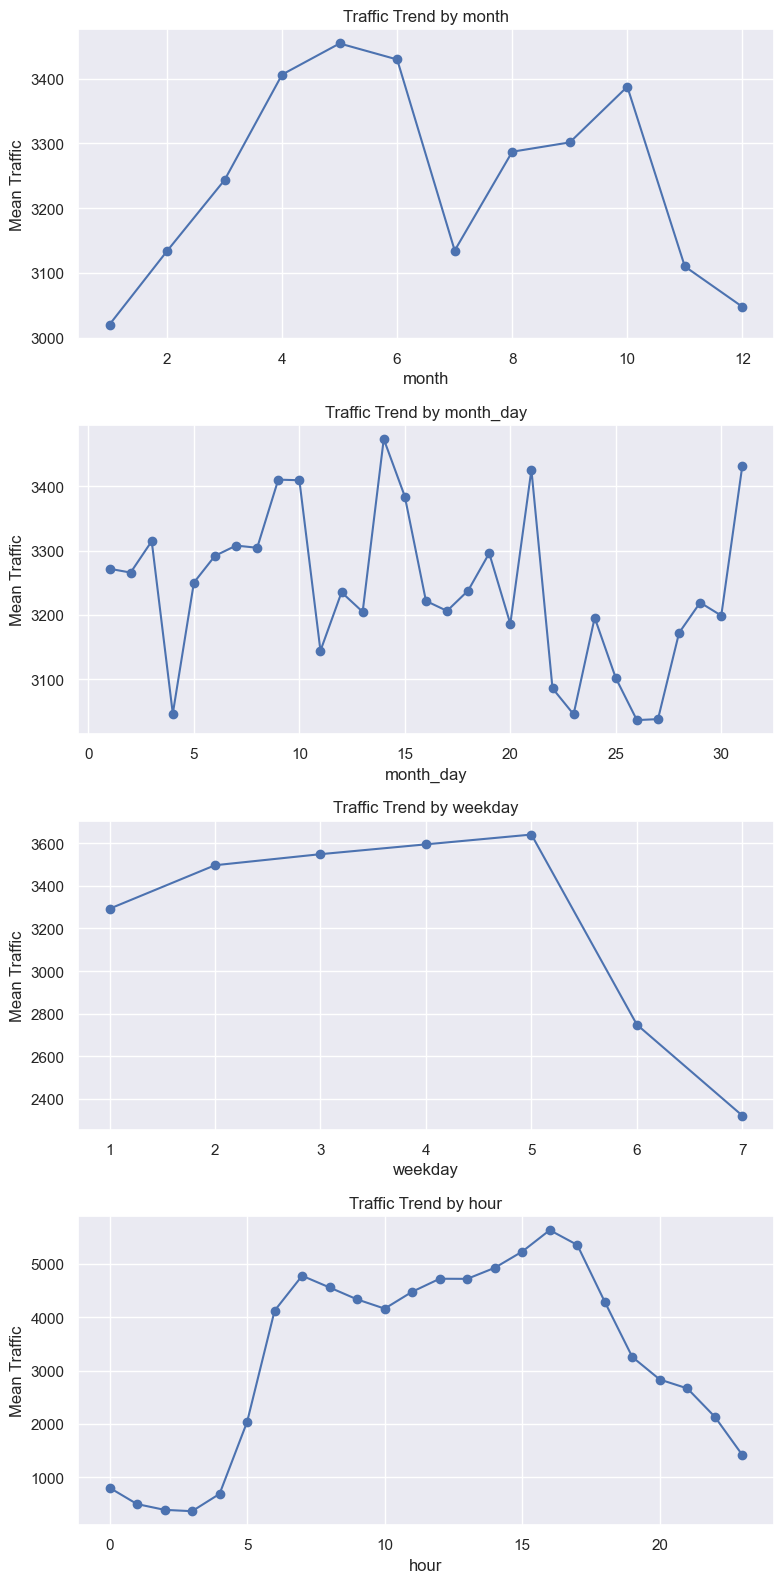

In [30]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

Yaha se model building chalu boss

X = data[features] # 9 features
Y = data[target] # traffic volume

In [31]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y).flatten()
warnings.filterwarnings('ignore')

In [32]:
print(X[:5])

[[1.         0.92223343 0.16666667 0.39130435 0.2        0.2
  0.36363636 0.11111111 0.05714286]
 [1.         0.92350242 0.66666667 0.65217391 0.96666667 0.6
  0.81818182 0.11111111 0.05714286]
 [0.         0.94211434 0.83333333 0.60869565 0.43333333 0.4
  0.45454545 0.         0.4       ]
 [0.         0.89854554 0.16666667 0.34782609 0.7        0.8
  0.18181818 0.11111111 0.05714286]
 [1.         0.91494485 0.83333333 0.34782609 0.63333333 0.
  0.81818182 0.33333333 0.14285714]]


aagaya hero apna, Deep Learning using Multi Layered Perceptron 
|| Initial run: used relu activation, jisse mapping mein gadbad hogayi kyunki MinMax use kiya tha
|| merko isme 2 din lage samajhne mein ki data change hone pe mlp alag train kyu ho raha
|| Final run: used sigmoid, jisse 0 to 1 ke beech mein map hogaye values

In [33]:
khela = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100, 75, 50, 25, 20), activation = 'logistic').fit(X, Y)
new = []
print('predicted output :=', khela.predict(X[:500]))
print('Actual output :=', Y[:500])
khela

predicted output := [0.66992071 0.6743507  0.67528562 0.66260005 0.60447191 0.59740348
 0.54388241 0.08360548 0.66287546 0.11873718 0.6595801  0.48853247
 0.04442066 0.64597649 0.1136676  0.10673074 0.65586057 0.10554151
 0.31704408 0.57436328 0.27391248 0.67013619 0.04383396 0.09449345
 0.67319856 0.11365712 0.63275394 0.46314064 0.24086304 0.67518999
 0.10548561 0.34847882 0.06853607 0.04885031 0.06141431 0.23525402
 0.07439537 0.0451724  0.67306452 0.29229571 0.67530406 0.04395255
 0.67528221 0.67364666 0.59859507 0.67425167 0.23717794 0.34758186
 0.37897014 0.64944245 0.62083806 0.0626829  0.63678532 0.06142051
 0.0517953  0.63176091 0.26918034 0.6635622  0.10021232 0.46429821
 0.04557008 0.26536975 0.05863408 0.34429515 0.59143333 0.35503632
 0.67523448 0.67474849 0.22862039 0.65794307 0.26727319 0.67536519
 0.31128808 0.66653735 0.64042995 0.04540936 0.61997115 0.59762097
 0.67397739 0.52784712 0.67446704 0.67536889 0.28306983 0.6438957
 0.41373278 0.48770474 0.67300331 0.0455437

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 75, 50, 25, 20),
             max_iter=500, random_state=1)

In [34]:
with open('weights.pkl', 'wb') as f:
    pickle.dump(khela, f)

In [35]:
pickle.dumps(khela)

b'\x80\x04\x95\x81\x14\x01\x00\x00\x00\x00\x00\x8c-sklearn.neural_network._multilayer_perceptron\x94\x8c\x0cMLPRegressor\x94\x93\x94)\x81\x94}\x94(\x8c\nactivation\x94\x8c\x08logistic\x94\x8c\x06solver\x94\x8c\x04adam\x94\x8c\x05alpha\x94G?\x1a6\xe2\xeb\x1cC-\x8c\nbatch_size\x94\x8c\x04auto\x94\x8c\rlearning_rate\x94\x8c\x08constant\x94\x8c\x12learning_rate_init\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x07power_t\x94G?\xe0\x00\x00\x00\x00\x00\x00\x8c\x08max_iter\x94M\xf4\x01\x8c\x04loss\x94\x8c\rsquared_error\x94\x8c\x12hidden_layer_sizes\x94(KdKKK2K\x19K\x14t\x94\x8c\x07shuffle\x94\x88\x8c\x0crandom_state\x94K\x01\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x07verbose\x94\x89\x8c\nwarm_start\x94\x89\x8c\x08momentum\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x12nesterovs_momentum\x94\x88\x8c\x0eearly_stopping\x94\x89\x8c\x13validation_fraction\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x06beta_1\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x06beta_2\x94G?\xef\xf7\xce\xd9\x16\x87+\x8c\x07epsilon\x94G>Ey\x8e\xe20\x8c:\x

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.7)
y_pred = khela.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))

Mean Absolute Error: 0.08747714671565644


X takes input in the form of:

*   is_holiday (0 for No, 1 for Yes)

*   temperature	(ranging from 0 to 32)

*     weekday	(kaunsa din hai hafte ka)

*   hour	(in the format of 24h)


*   month_day	(what is the date)


*   year


*   month


*   weather_type	(from 1 to 11 ranging according to the weather type list)

*   weather_description (from 1 to 32 ranging according to the description list)


New data pe kaisa chalra hai MLP

In [43]:
unseen_data = [1, 17, 5, 3, 22, 2015, 6, 1, 24]
print(type(unseen_data))
unseen_data = x_scaler.transform([unseen_data])
print(unseen_data)
results = khela.predict(unseen_data)
print('Before inverse Scaling :', results)

<class 'list'>
[[1.         0.90456513 0.66666667 0.13043478 0.7        0.6
  0.45454545 0.         0.68571429]]
Before inverse Scaling : [0.04393481]


In [44]:
pred_y = y_scaler.inverse_transform([results])
print('Traffic Volume : ', pred_y)

Traffic Volume :  [[319.92277256]]


In [45]:
if(pred_y<=1300):
  print("No Traffic at all, enjoy your journey. Be safe :) ")
elif pred_y > 1300 and pred_y <= 1700:
  print("Seems a little bit busy, but you'll get there :P ")
elif pred_y > 1700 and pred_y <= 3500:
  print("Might as well carry your headphones or keep your playlist ready, heavy traffic ahead :( ")
else:
  print("Whoops! Consider cancelling your plans today, or delay it a bit; it's a roadblock")

No Traffic at all, enjoy your journey. Be safe :) 
